In [103]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [104]:
img1 = 'C:\\Users\\USER\\OneDrive\\Escritorio\\Maestría\\DeepLearning\\Ejercicio vgg16\\mapche.jpg'
img2 = 'C:\\Users\\USER\\OneDrive\\Escritorio\\Maestría\\DeepLearning\\Ejercicio vgg16\\panda.jpg'
img3 = 'C:\\Users\\USER\\OneDrive\\Escritorio\\Maestría\\DeepLearning\\Ejercicio vgg16\\perro.jpg'
img4 = 'C:\\Users\\USER\\OneDrive\\Escritorio\\Maestría\\DeepLearning\\Ejercicio vgg16\\tigre.jpg'

imgs = [img1, img2, img3, img4]

In [105]:
def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def _load_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def _get_clasification(model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.Resampling.LANCZOS))
    plt.show()

    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(VGG16_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

In [106]:
from keras.applications.vgg16 import VGG16
VGG16_model = VGG16(weights='imagenet')

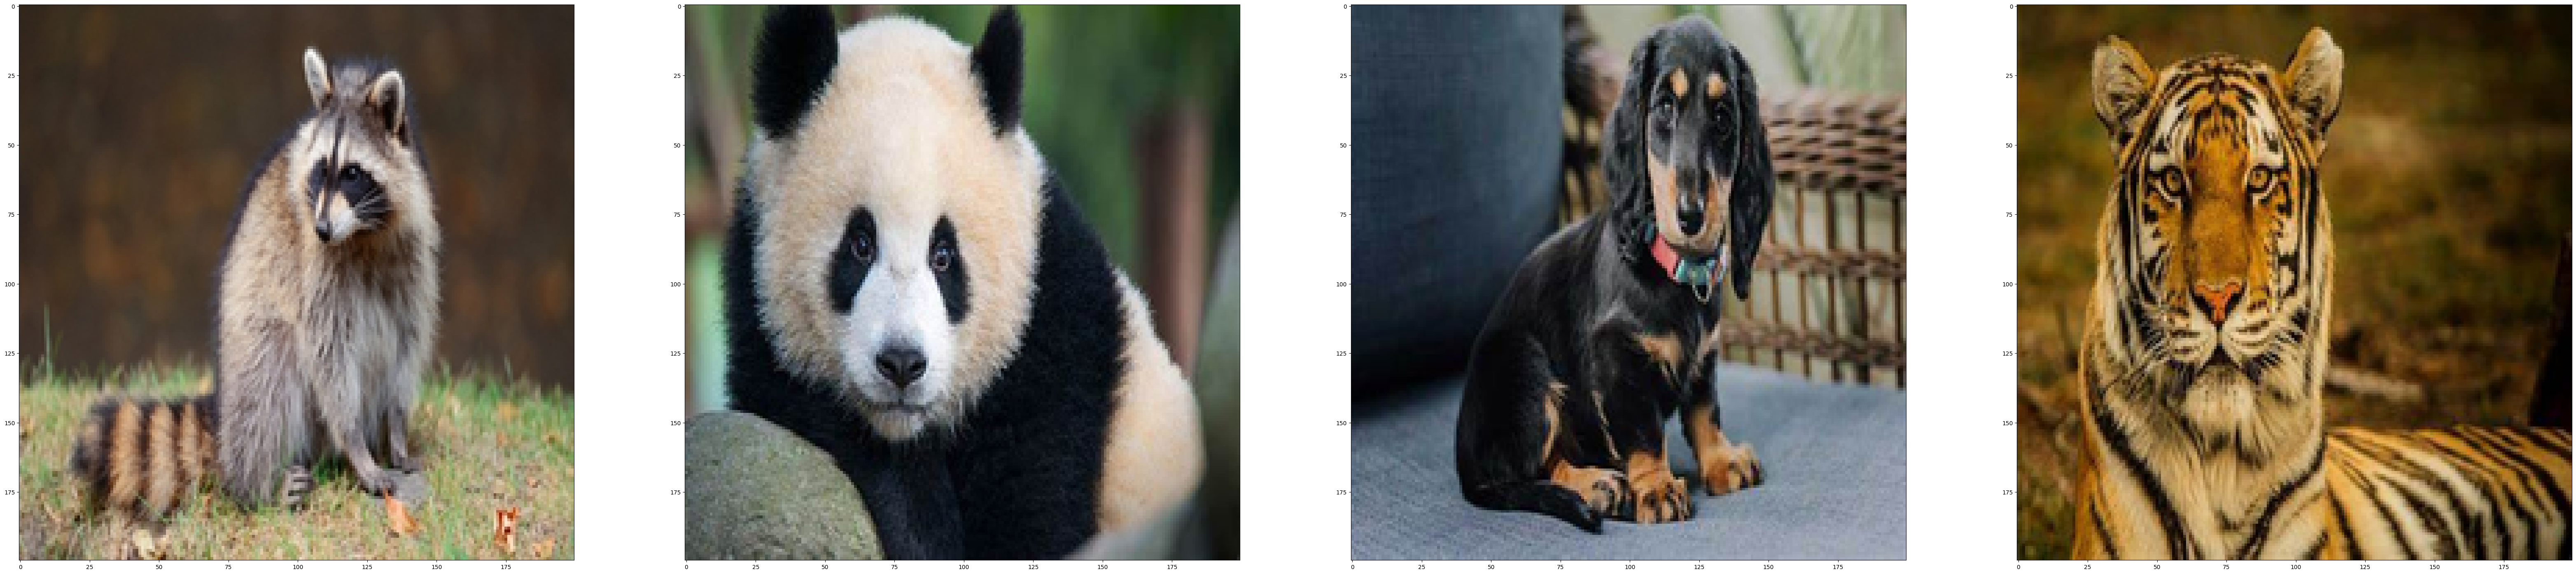

1/1 [==============================] - 0s 13ms/step


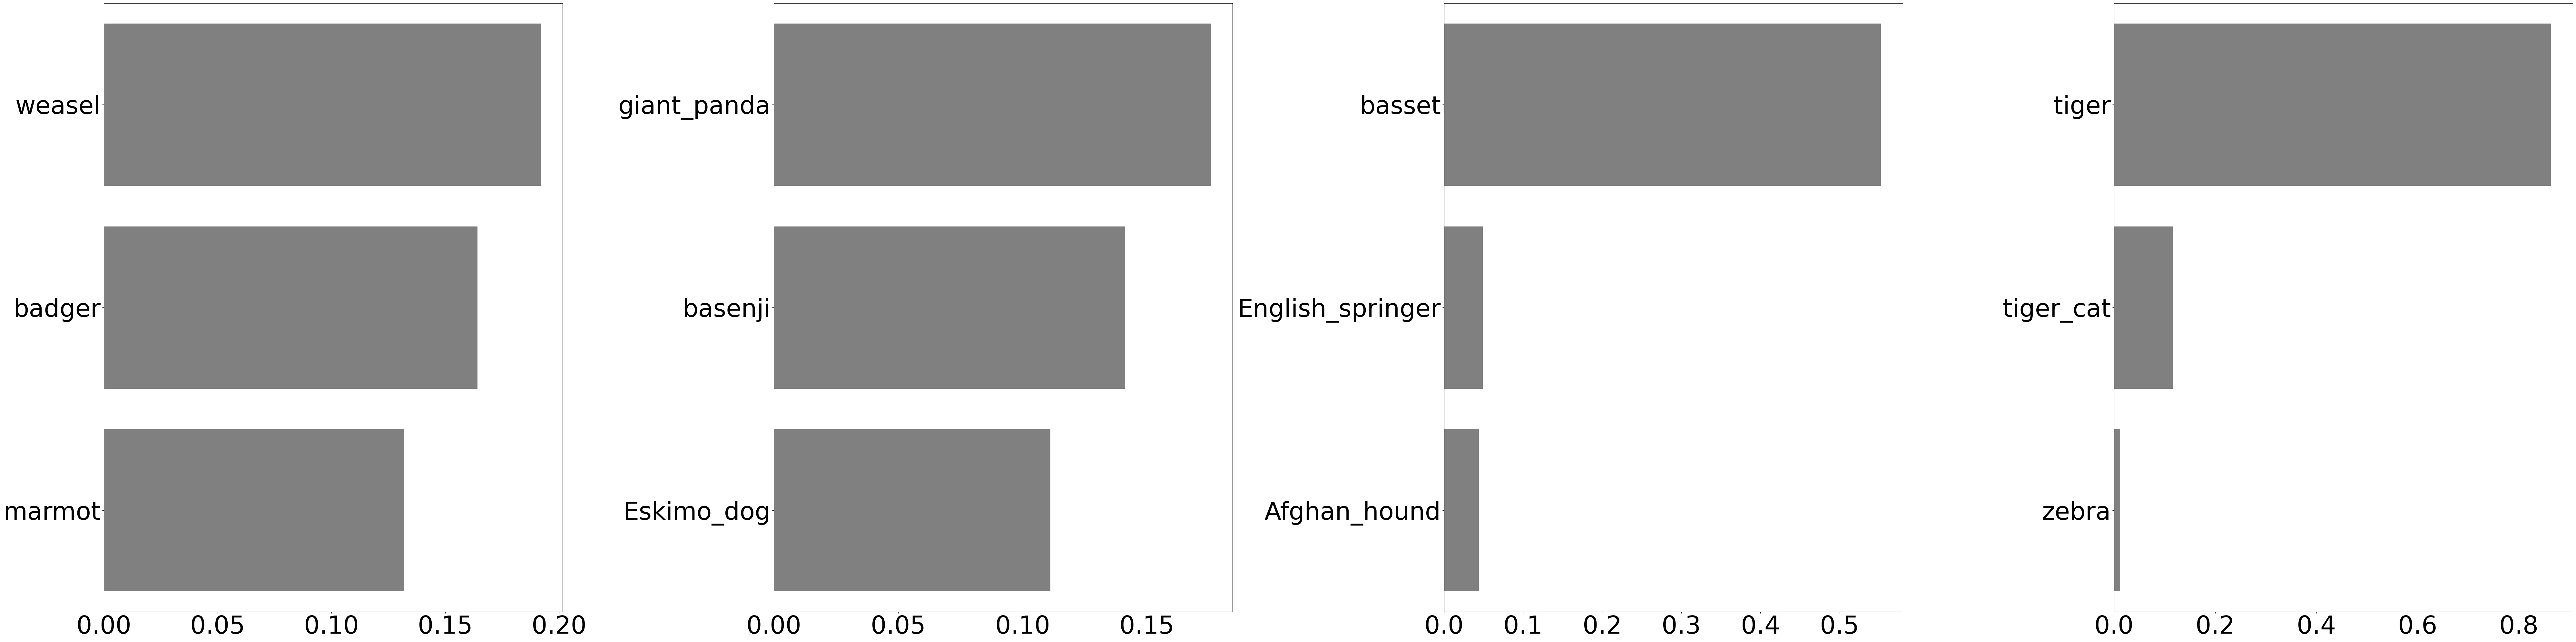

In [107]:
_get_clasification(VGG16_model)

# Bloque Residual

In [108]:
import cv2
import matplotlib.pyplot as plt
import scipy.signal

np.random.seed(18)

In [ ]:
def relu(x):
    return np.maximum(0, x)

def residual_block(image, filter1,filter2):
    out = scipy.signal.convolve2d(image,filter1,mode='same',boundary='wrap')
    out = relu(out)
    out = scipy.signal.convolve2d(out,filter2,mode='same',boundary='wrap')
    return relu(out + image) # Para garantizar que se transfiera la información de la imagen original

def no_residual_block(image, filter1,filter2):
    out = scipy.signal.convolve2d(image,filter1,mode='same',boundary='wrap')
    out = relu(out)
    out = scipy.signal.convolve2d(out,filter2,mode='same',boundary='wrap')
    return relu(out)

def _load_image_gray(path):
    # Leer la imagen como bytes
    with open(path, "rb") as f:
        img_bytes = f.read()

    img_np = np.frombuffer(img_bytes, np.uint8)
    img = cv2.imdecode(img_np, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: No se pudo cargar la imagen en {path}")
    img = cv2.resize(img, (320, 320))
    img = img.astype(np.float32) / 255
    return img

In [110]:
img_path = r'C:\\Users\\USER\\OneDrive\\Escritorio\\Maestría\\DeepLearning\\Ejercicio vgg16\\mapche.jpg'
X = _load_image_gray(img_path)

In [111]:
filter1 = np.random.randn(3, 3)
filter2 = np.random.randn(3, 3)
filter3 = np.random.randn(3, 3)
filter4 = np.random.randn(3, 3)

In [112]:
out1 = residual_block(X, filter1, filter2)
out2 = residual_block(X, filter3, filter4)

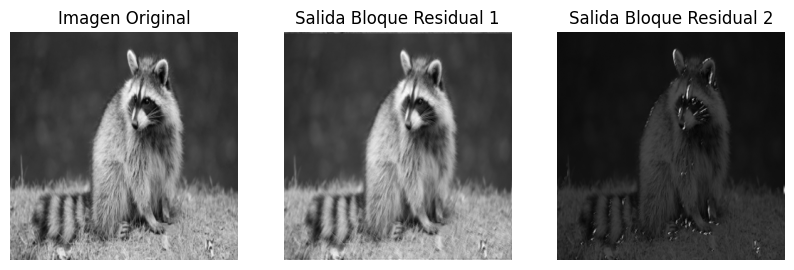

Salida final de la mini ResNet: (320, 320)


In [113]:
# Mostrar imágenes
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(X, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(out1, cmap='gray')
plt.title("Salida Bloque Residual 1")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(out2, cmap='gray')
plt.title("Salida Bloque Residual 2")
plt.axis("off")

plt.show()

print("Salida final de la mini ResNet:", out2.shape)

# Modelo ResNet 50 en código

In [114]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar el modelo preentrenado en ImageNet
model = ResNet50(weights='imagenet')

# Ver la arquitectura del modelo
model.summary()

102967424/102967424 [==============================] - 10s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

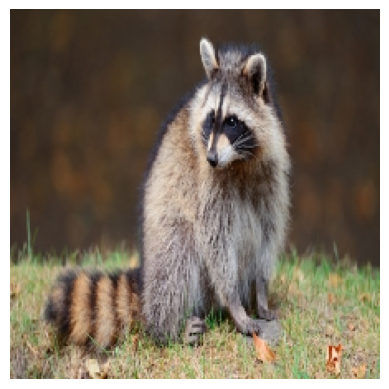

In [115]:
# Cargar imagen desde archivo
img_path = r'C:\\Users\\USER\\OneDrive\\Escritorio\\Maestría\\DeepLearning\\Ejercicio vgg16\\mapche.jpg' # Ruta de la imagen
img = image.load_img(img_path, target_size=(224, 224))

# Mostrar la imagen
plt.imshow(img)
plt.axis("off")
plt.show()

# Convertir la imagen a un array de numpy
img_array = image.img_to_array(img)

# Expandir dimensiones para que tenga el formato adecuado para el modelo
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen (normalización según ResNet-50)
img_array = preprocess_input(img_array)

In [116]:
# Hacer la predicción
predictions = model.predict(img_array)

# Decodificar los resultados en etiquetas de ImageNet
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

1/1 [==============================] - 1s 1s/step
1: badger (0.72)
2: Arctic_fox (0.02)
3: skunk (0.02)


# Transfer Learning

In [118]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import os
import shutil
import numpy as np
from PIL import Image # import the Image module to save images

# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases de CIFAR-10
class_names = ["avion", "automovil", "pajaro", "gato", "ciervo", "perro", "rana", "caballo", "barco", "camion"]

# Crear carpetas para train y test
for split, data, labels in [("train", x_train, y_train), ("test", x_test, y_test)]:
    os.makedirs(f"data/{split}", exist_ok=True)
    for class_idx, class_name in enumerate(class_names):
        os.makedirs(f"data/{split}/{class_name}", exist_ok=True)

        # Guardar imágenes en las carpetas correspondientes
        idx = np.where(labels.flatten() == class_idx)[0]
        for i in idx[:100]:  # Guardar 100 imágenes por clase (ajusta según necesites)
            # Create an Image object from the NumPy array
            img = Image.fromarray(data[i].astype(np.uint8))

            # Save the image to the desired path
            img_path = f"data/{split}/{class_name}/{i}.png"
            img.save(img_path) # save the image instead of copying
            # shutil.copy(img_path, f"data/{split}/{class_name}/") # Remove this line

170498071/170498071 [==============================] - 15s 0us/step


Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/200
32/32 [==============================] - 10s 249ms/step - loss: 2.3719 - accuracy: 0.0750 - val_loss: 2.3041 - val_accuracy: 0.1200
Epoch 2/200
32/32 [==============================] - 7s 226ms/step - loss: 2.3254 - accuracy: 0.0890 - val_loss: 2.3388 - val_accuracy: 0.1000
Epoch 3/200
32/32 [==============================] - 7s 228ms/step - loss: 2.3233 - accuracy: 0.1030 - val_loss: 2.3108 - val_accuracy: 0.1000
Epoch 4/200
32/32 [==============================] - 7s 226ms/step - loss: 2.3068 - accuracy: 0.0930 - val_loss: 2.3012 - val_accuracy: 0.1170
Epoch 5/200
32/32 [==============================] - 7s 226ms/step - loss: 2.2932 - accuracy: 0.1130 - val_loss: 2.3004 - val_accuracy: 0.1080
Epoch 6/200
32/32 [==============================] - 7s 226ms/step - loss: 2.2895 - accuracy: 0.1160 - val_loss: 2.2800 - val_accuracy: 0.1630
Epoch 7/200
32/32 [==============================] - 7s

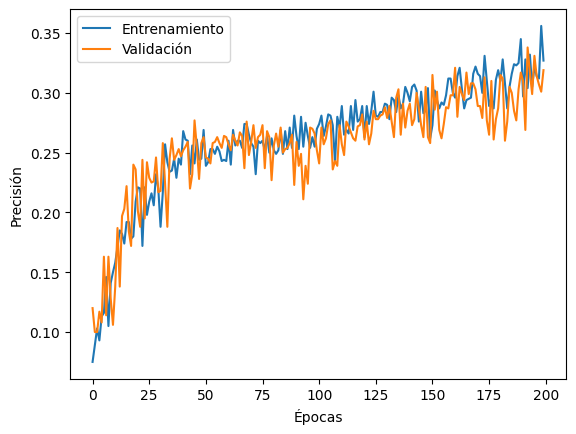

32/32 [==============================] - 3s 86ms/step - loss: 1.8605 - accuracy: 0.3190
Precisión final en test: 31.90%


In [121]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce la dimensión sin perder información
x = Dense(256, activation='relu')(x)  # Capa intermedia
x = Dense(128, activation='relu')(x)  # Otra capa intermedia
x = Dense(10, activation='softmax')(x)  # Capa final con 10 clases (CIFAR-10)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "data/train"  # Debe contener subcarpetas para cada clase
test_dir = "data/test"

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

history = model.fit(train_generator, validation_data=test_generator, epochs=200)

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

model.save("resnet50_transfer_learning.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Precisión final en test: {accuracy:.2%}")